#STEP 1: Install & Import Libraries

In [1]:
!pip install -q seaborn scikit-learn pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


# STEP 2: Create or Load Dataset

In [16]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('student_dropout.csv')  # Adjust the filename if necessary

# Display the first few rows of the dataset to check the data structure
print(data.head())


print(data.isnull().sum())

Saving student_dropout.csv to student_dropout (1).csv
   attendance    grades  participation dropout_risk
0          78  6.563552              6           no
1          91  6.166674              7          yes
2          68  9.689376              0           no
3          54  8.756271              5          yes
4          82  7.978561              7           no
attendance       0
grades           0
participation    0
dropout_risk     0
dtype: int64


# STEP 3: Split Data

In [17]:
X = data[['attendance', 'grades', 'participation']]
y = data['dropout_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: Train Classifier

In [15]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# STEP 5: Predictions & Evaluation

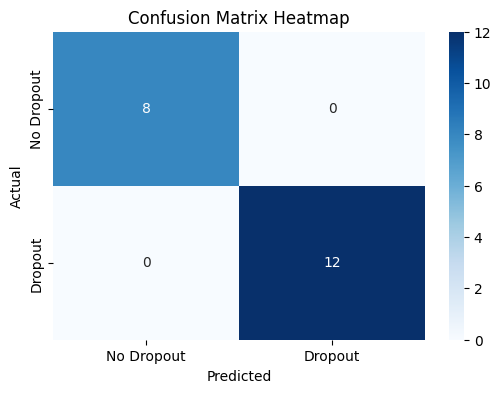

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [7]:
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dropout', 'Dropout'], yticklabels=['No Dropout', 'Dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Classification Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))